In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
city_list_df = pd.read_csv("./city_list.csv")
city_list_df.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [6]:
city_data_df = pd.read_csv("./city_data.csv")
city_data_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [15]:
city_data_df['country'].unique()

array(["Côte D'Ivoire", 'United Arab Emirates', 'Nigeria', 'Ghana',
       'Turkey', 'Australia', 'India', 'United States', 'Egypt',
       'Algeria', 'Kazakhstan', 'Netherlands', 'China', 'Madagascar',
       'Eritrea', 'Greece', 'Iraq', 'Azerbaijan', 'Mali', 'Indonesia',
       'Thailand', 'Central African Republic', 'Spain', 'Venezuela',
       'Colombia', 'Lebanon', 'United Kingdom', 'Serbia', 'Brazil',
       'Libya', 'Germany', 'Switzerland', 'Guinea Bissau', 'Slovakia',
       'Congo', 'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco',
       'Russia', 'Moldova', 'Sri Lanka', 'Guinea', 'Denmark', 'Argentina',
       'Senegal', 'Syria', 'Tanzania', 'Bangladesh', 'Qatar', 'Cameroon',
       'Ireland', 'South Africa', 'Tajikistan', 'Mexico', 'Pakistan',
       'Sierra Leone', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Vietnam', 'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Afghanistan',
       'Uganda', 'Taiwan', 'Nepal', 'Ukraine', 'Rwanda', 'Canada',
       'Jamaica', 

In [28]:
pd.unique(city_data_df[city_data_df['country']=='Iran']['city'])

array(['Mashhad', 'Shiraz', 'Tabriz'], dtype=object)

In [30]:
my_city = city_data_df[(city_data_df['country']=='Iran') &  (city_data_df['city']=='Shiraz')]
my_city.head()

,year,city,country,avg_temp
59879,1842,Shiraz,Iran,17.19
59880,1843,Shiraz,Iran,18.86
59881,1844,Shiraz,Iran,19.29
59882,1845,Shiraz,Iran,18.67
59883,1846,Shiraz,Iran,20.07


In [118]:
toronto_df = city_data_df[(city_data_df['country']=='Canada') &  (city_data_df['city']=='Toronto')]
toronto_df.head()

,year,city,country,avg_temp
64578,1743,Toronto,Canada,-0.11
64579,1744,Toronto,Canada,8.38
64580,1745,Toronto,Canada,-3.96
64581,1746,Toronto,Canada,NaN
64582,1747,Toronto,Canada,NaN


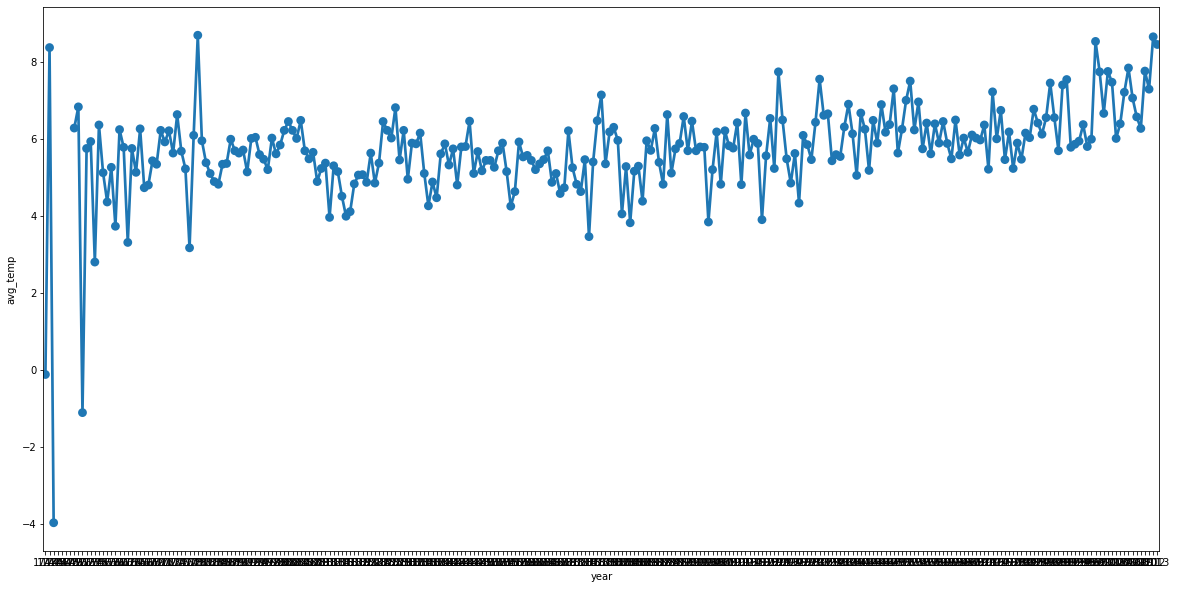

In [119]:
plt.figure(figsize=(20,10),)
sns.pointplot(x='year', y='avg_temp', data=toronto_df)

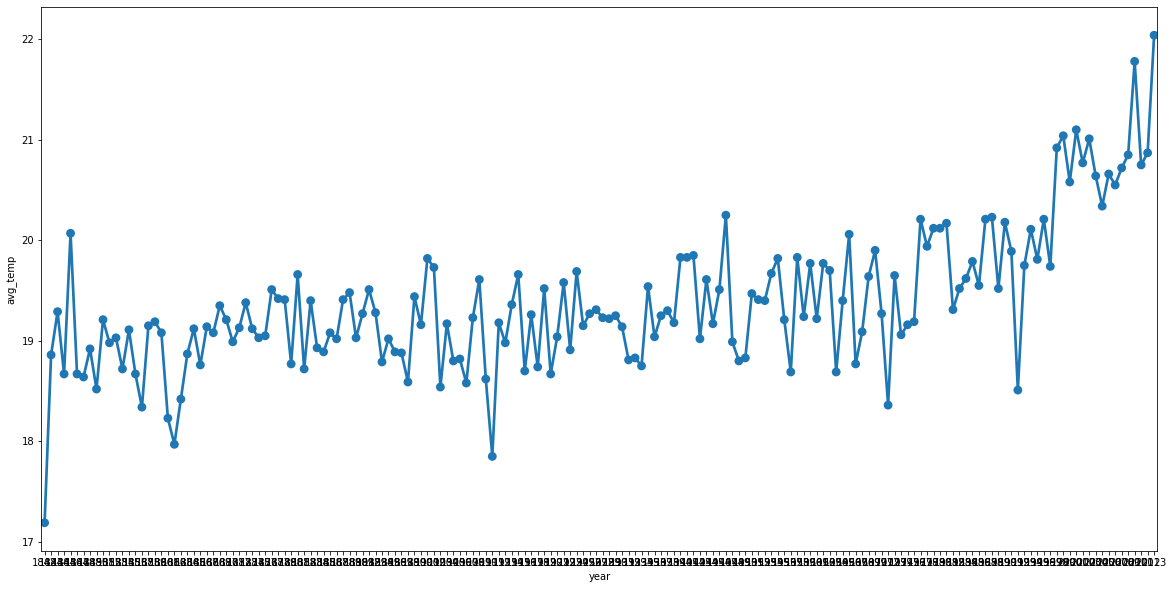

In [34]:
plt.figure(figsize=(20,10),)
sns.pointplot(x='year', y='avg_temp', data=my_city)

In [10]:
global_data_df = pd.read_csv("./global_data.csv")
global_data_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


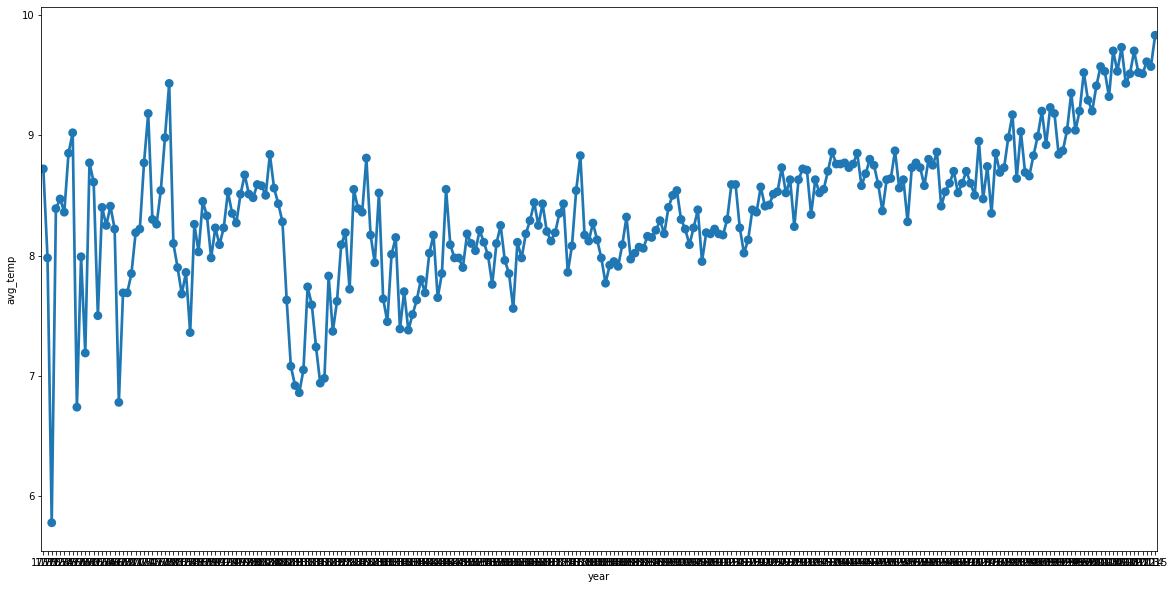

In [32]:
plt.figure(figsize=(20,10),)
sns.pointplot(x='year', y='avg_temp', data=global_data_df)

Text(0, 0.5, 'Temp_Toronto')

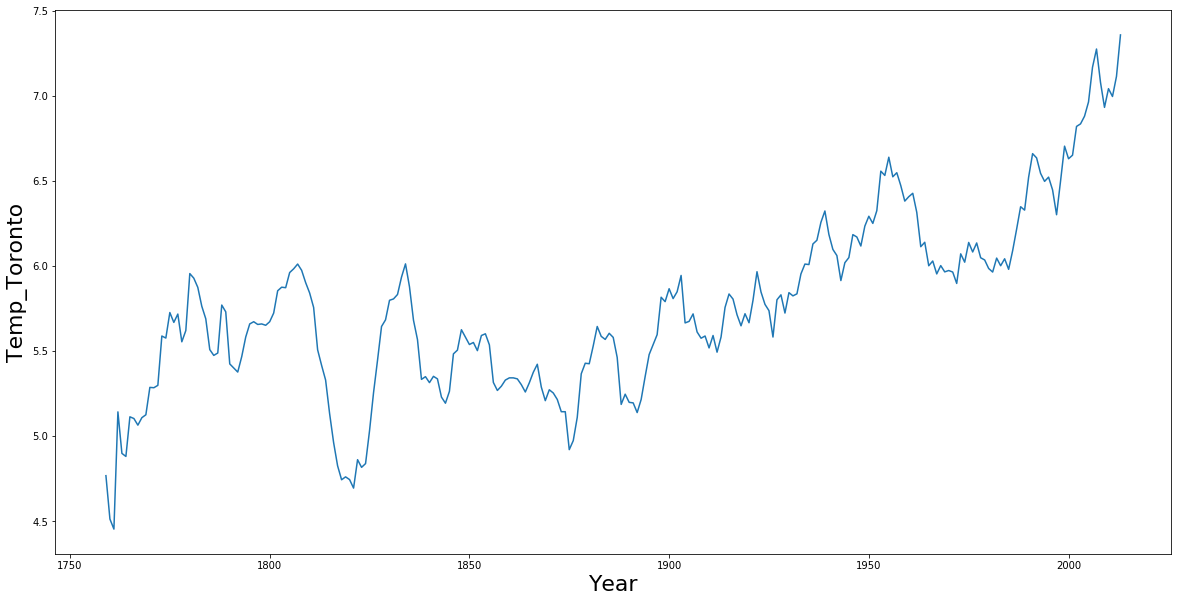

In [128]:
window_size = 10
toron_mv_avg = toronto_df.avg_temp.rolling(window_size).mean()
toron_mv_avg_list = toron_mv_avg.to_list() 
toron_mv_avg_no_nan = toron_mv_avg_list[window_size-1:] # Masking is for removing NaNs

plt.figure(figsize=(20,10),)
plt.plot(toronto_df.year[window_size-1:], toron_mv_avg_no_nan)
plt.xlabel("Year", fontsize=22)
plt.ylabel("Temp_Toronto", fontsize=22)

In [123]:
window_size = 10
mv_avg = my_city.avg_temp.rolling(window_size).mean()
mv_avg_list = mv_avg.to_list() # Masking is for removing NaNs
mv_avg_no_nan = mv_avg_list[window_size-1:]

Text(0, 0.5, 'Temp_shiraz')

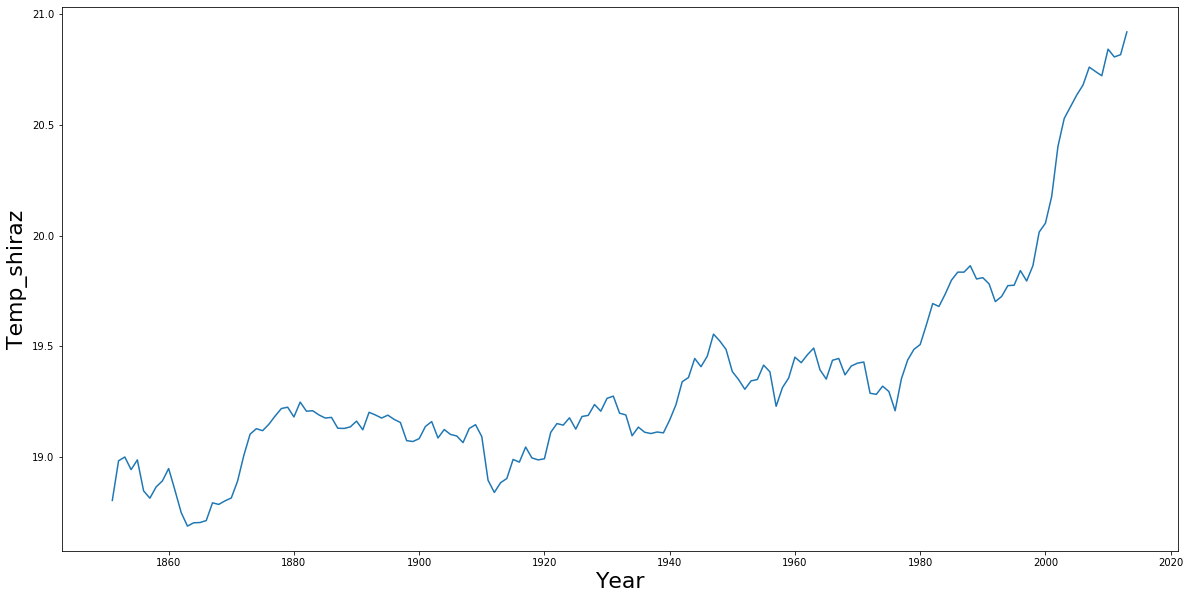

In [124]:
plt.figure(figsize=(20,10),)
plt.plot(my_city.year[window_size-1:], mv_avg_no_nan)
plt.xlabel("Year", fontsize=22)
plt.ylabel("Temp_shiraz", fontsize=22)

In [110]:
window_size = 10
gb_mv_avg = global_data_df.avg_temp.rolling(window_size).mean()
gb_mv_avg_list = gb_mv_avg.to_list() # Masking is for removing NaNs
gb_mv_avg_no_nan = gb_mv_avg_list[window_size-1:]

Text(0, 0.5, 'Temp_glob')

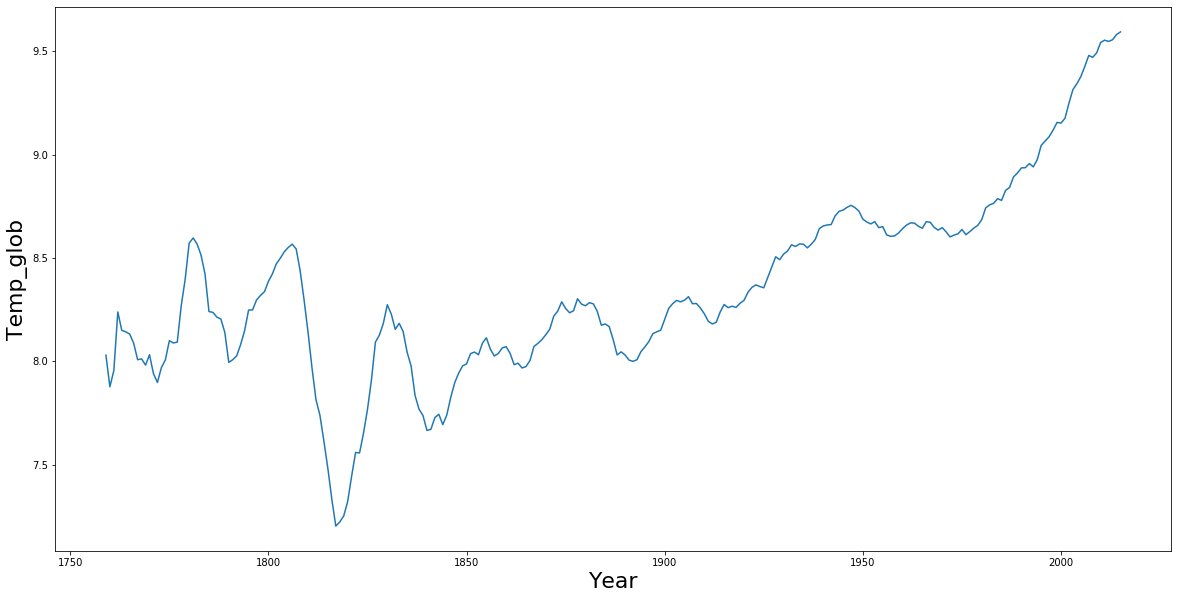

In [111]:
plt.figure(figsize=(20,10),)
plt.plot(global_data_df.year[window_size-1:], gb_mv_avg_no_nan)
plt.xlabel("Year", fontsize=22)
plt.ylabel("Temp_glob", fontsize=22)

In [133]:
merged_df = pd.merge(global_data_df, my_city, on='year')
merged_df = pd.merge(merged_df, toronto_df, on='year')
merged_df.head()

,year,avg_temp_x,city_x,country_x,avg_temp_y,city_y,country_y,avg_temp
0,1842,8.02,Shiraz,Iran,17.19,Toronto,Canada,5.75
1,1843,8.17,Shiraz,Iran,18.86,Toronto,Canada,4.81
2,1844,7.65,Shiraz,Iran,19.29,Toronto,Canada,5.80
3,1845,7.85,Shiraz,Iran,18.67,Toronto,Canada,5.81
4,1846,8.55,Shiraz,Iran,20.07,Toronto,Canada,6.47


In [148]:
window_size = 5
gb_mv_avg = merged_df.avg_temp_x.rolling(window_size).mean()
merged_df['gb_mv_avg'] = gb_mv_avg

shiraz_mv_avg = merged_df.avg_temp_y.rolling(window_size).mean()
merged_df['shiraz_mv_avg'] = shiraz_mv_avg

toron_mv_avg = merged_df.avg_temp.rolling(window_size).mean()
merged_df['toronto_mv_avg'] = toron_mv_avg
#merged_df.drop('city_mv_avg', inplace=True, axis=1)
merged_df.dropna(inplace=True)
merged_df.head()

,year,avg_temp_x,city_x,country_x,avg_temp_y,city_y,country_y,avg_temp,gb_mv_avg,toronto_mv_avg,shiraz_mv_avg
24,1866,8.29,Shiraz,Iran,18.76,Toronto,Canada,4.88,8.024,5.324,18.628
25,1867,8.44,Shiraz,Iran,19.14,Toronto,Canada,5.11,8.200,5.304,18.862
26,1868,8.25,Shiraz,Iran,19.08,Toronto,Canada,4.59,8.228,5.150,18.994
27,1869,8.43,Shiraz,Iran,19.35,Toronto,Canada,4.74,8.318,5.004,19.090
28,1870,8.20,Shiraz,Iran,19.21,Toronto,Canada,6.22,8.322,5.108,19.108


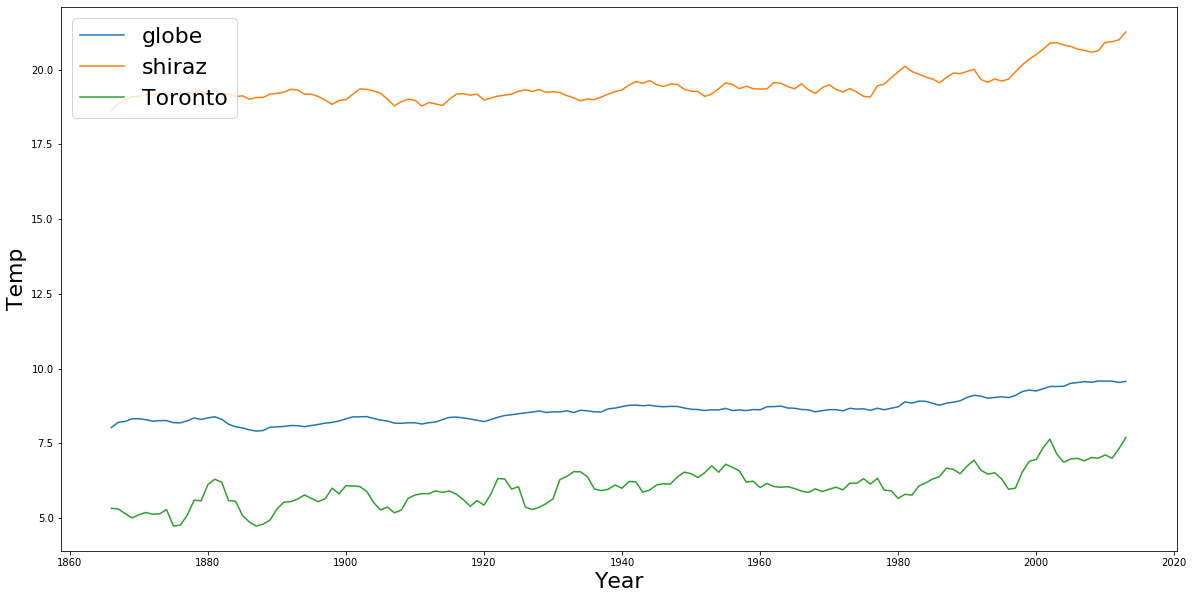

In [149]:
plt.figure(figsize=(20,10),)
plt.plot(merged_df.year, merged_df.gb_mv_avg, label="globe")
plt.plot(merged_df.year, merged_df.shiraz_mv_avg, label="shiraz")
plt.plot(merged_df.year, merged_df.toronto_mv_avg, label="Toronto")

plt.xlabel("Year", fontsize=22)
plt.ylabel("Temp", fontsize=22)
plt.legend(fontsize=22, loc=2)

**Lets chech weather there is any correlation between global temperature and Shiraz temp or not**

In [150]:
gb_shiraz_torornto_df = merged_df[['gb_mv_avg','shiraz_mv_avg', 'toronto_mv_avg']]
gb_shiraz_torornto_df.corr(method='pearson')

,gb_mv_avg,shiraz_mv_avg,toronto_mv_avg
gb_mv_avg,1.000000,0.901782,0.830241
shiraz_mv_avg,0.901782,1.000000,0.718041
toronto_mv_avg,0.830241,0.718041,1.000000
